In [15]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re

# Laad je dataset
df = pd.read_csv('reviews.csv')
df = df.dropna(subset=['UserId', 'ProductId', 'Score', 'Text', 'Summary'])

# Algemene tekstkenmerken
df['TextLengthWords'] = df['Text'].apply(lambda x: len(str(x).split()))
df['TextLengthChars'] = df['Text'].apply(lambda x: len(str(x)))
df['SummaryLengthWords'] = df['Summary'].apply(lambda x: len(str(x).split()))
df['TextToSummaryRatio'] = df['TextLengthWords'] / (df['SummaryLengthWords'] + 1)

# Sentimentkenmerken
df['SentimentText_Polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['SentimentText_Subjectivity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
df['SentimentSummary_Polarity'] = df['Summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['SentimentDelta'] = df['SentimentText_Polarity'] - df['SentimentSummary_Polarity']

# Structurele en emotionele kenmerken
df['NumExclamations'] = df['Text'].apply(lambda x: str(x).count('!'))
df['NumUppercaseWords'] = df['Text'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))
df['HasQuestionMark'] = df['Text'].apply(lambda x: int('?' in str(x)))
df['ContainsNegation'] = df['Text'].apply(lambda x: int(bool(re.search(r"\b(not|no|never|n't)\b", str(x).lower()))))
df['StartsWithCapital'] = df['Text'].apply(lambda x: int(str(x).split()[0].istitle() if str(x).split() else 0))
df['AvgWordLength'] = df['Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]) if len(str(x).split()) > 0 else 0)

df.to_csv('text_features_full.csv', index=False)


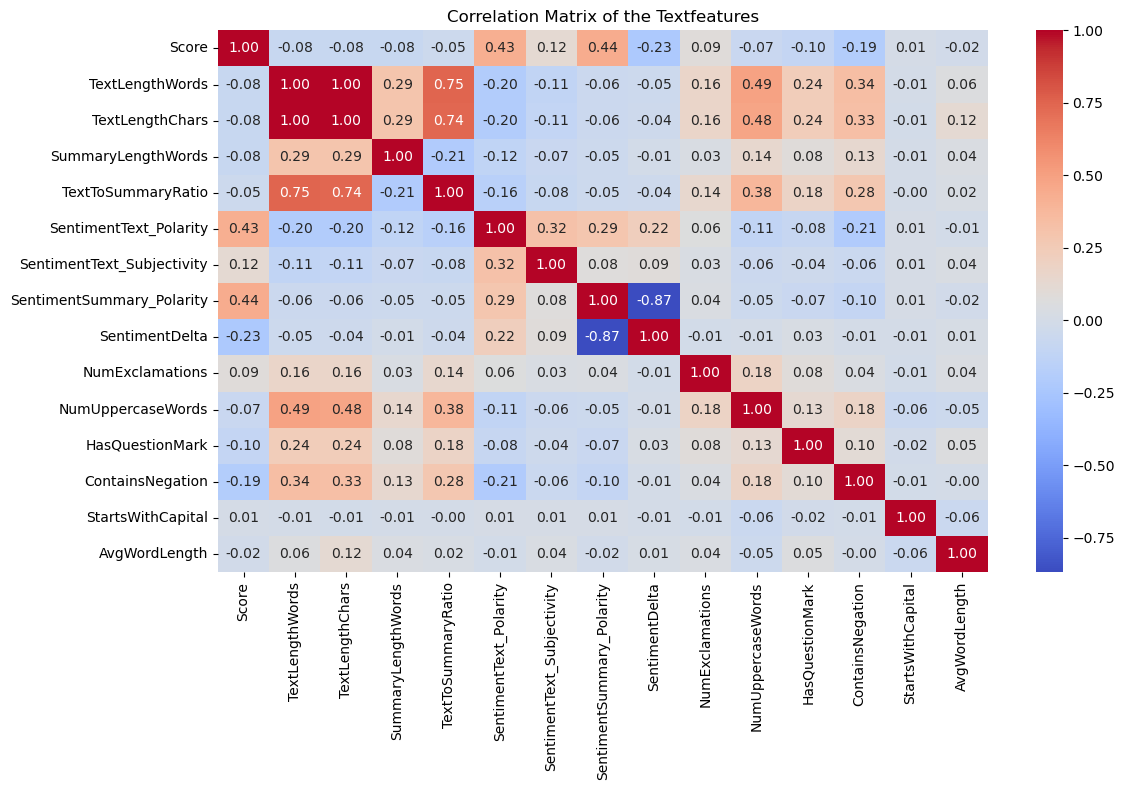

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('text_features_full.csv')
df = df.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Id', 'Time'], axis=1)

numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of the Textfeatures")
plt.tight_layout()
plt.show()


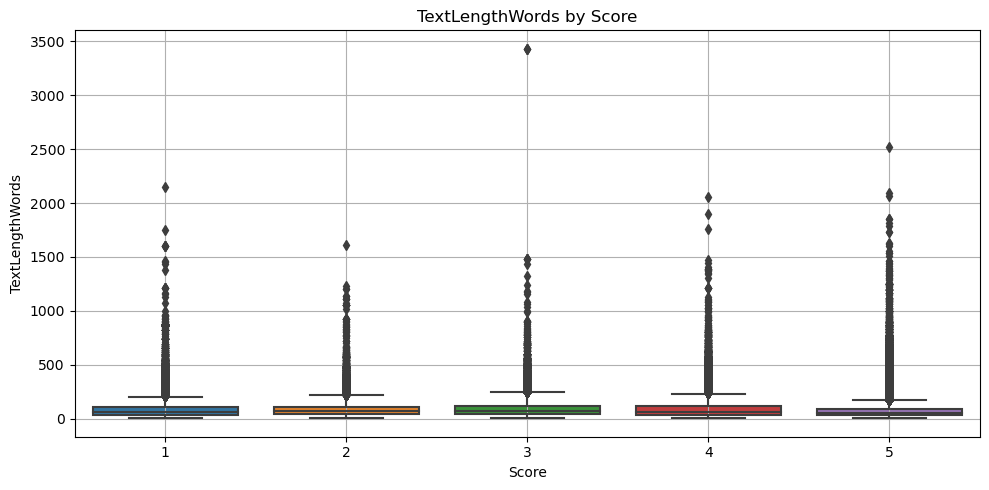

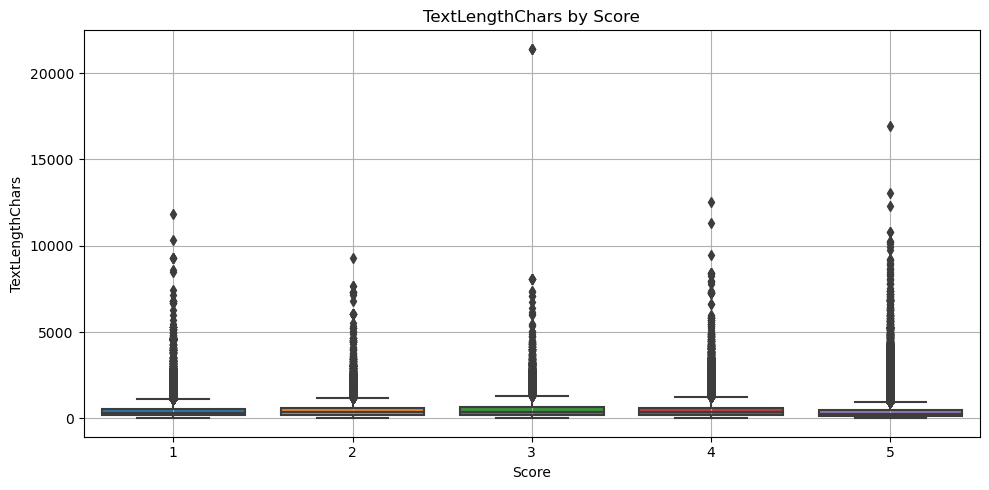

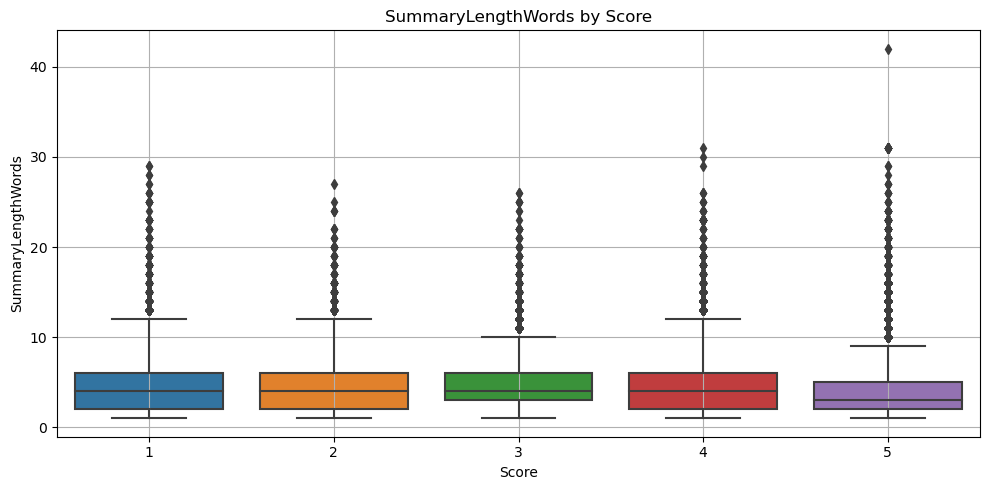

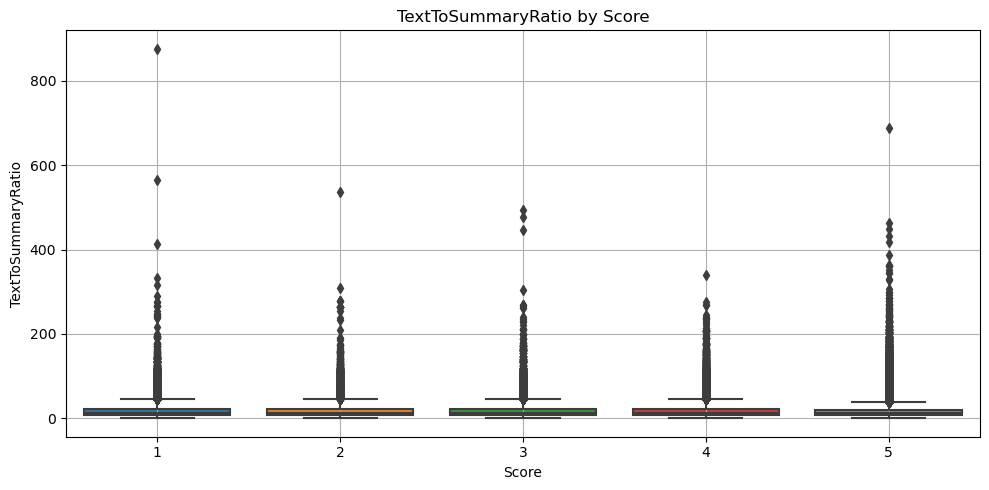

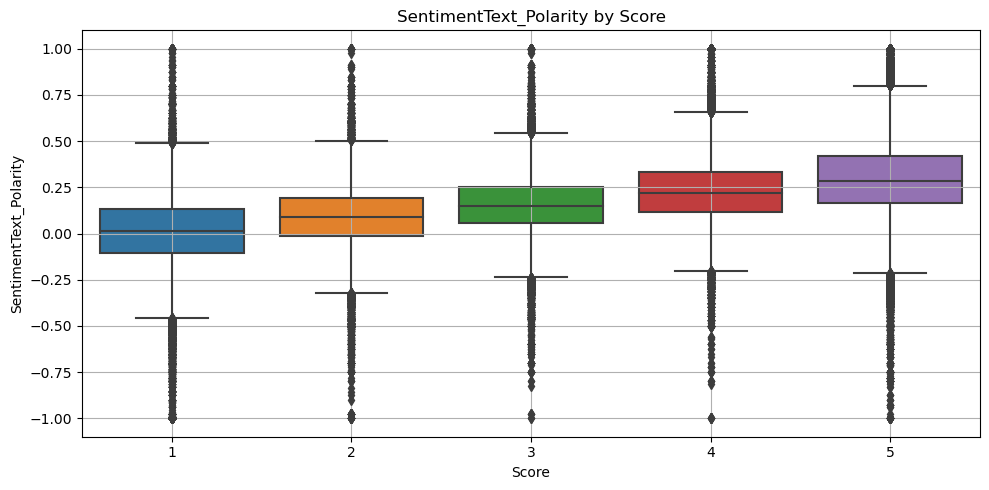

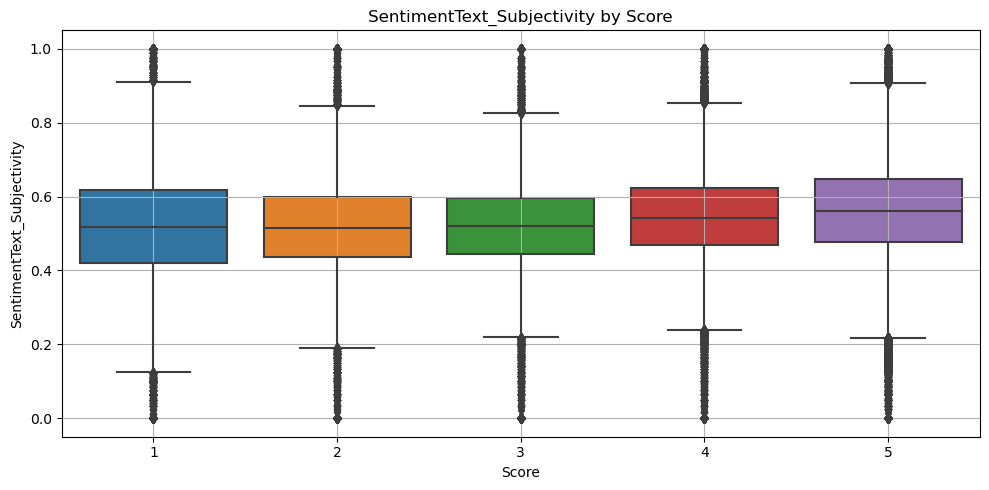

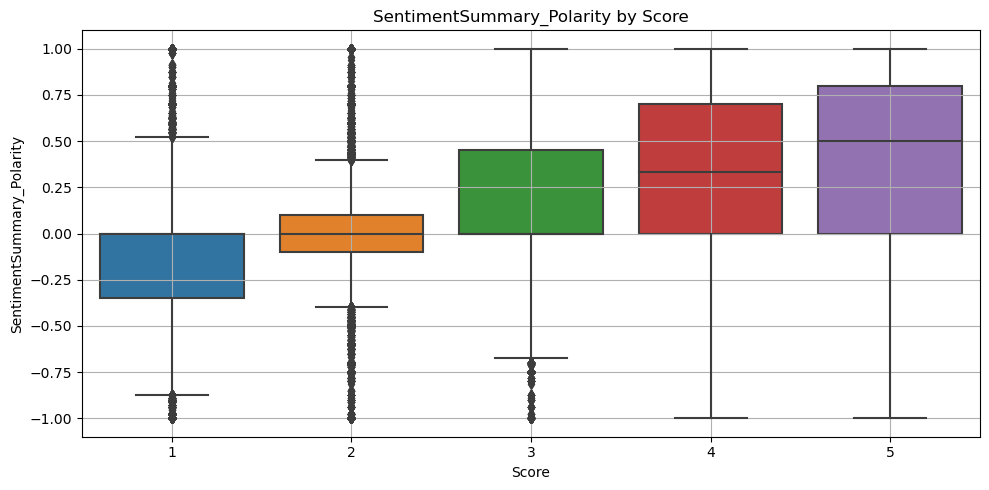

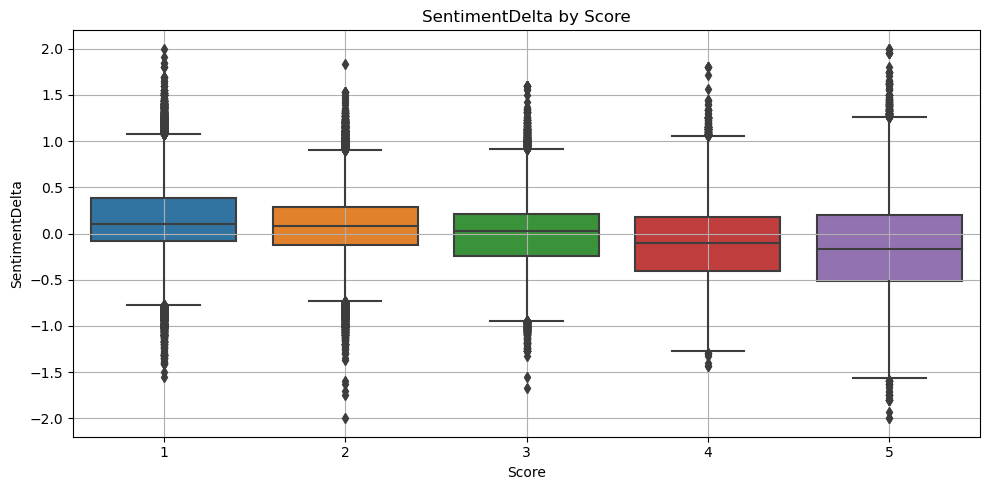

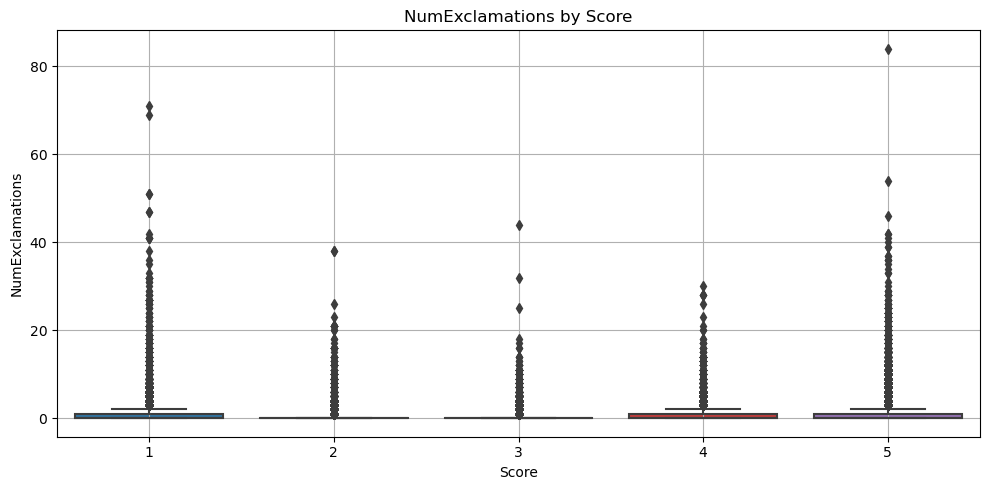

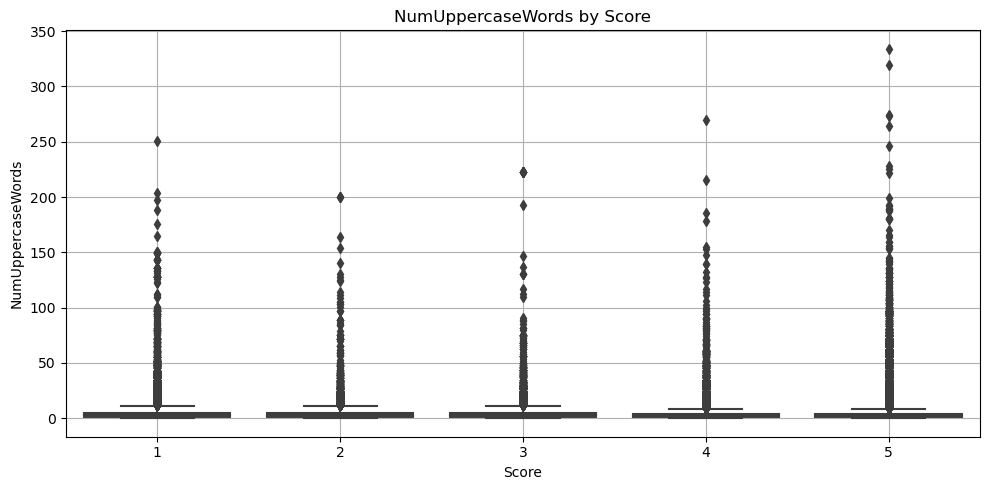

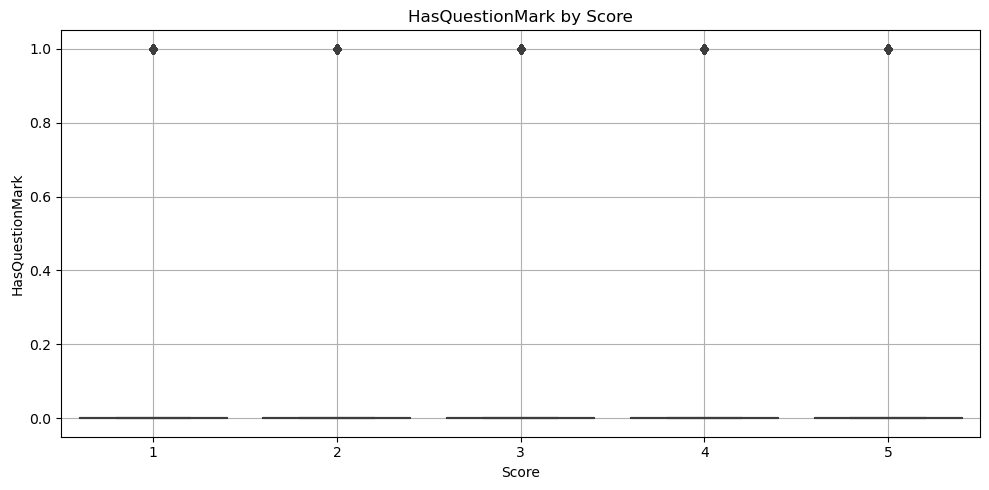

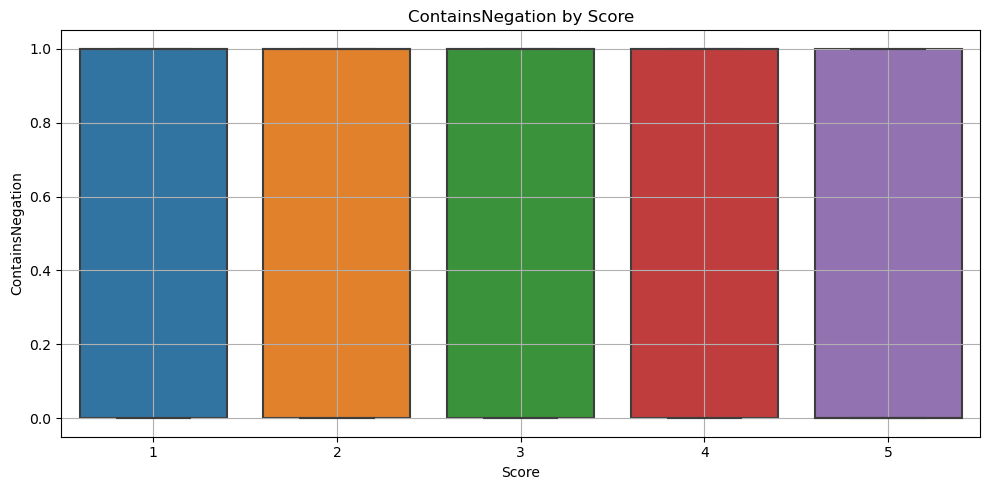

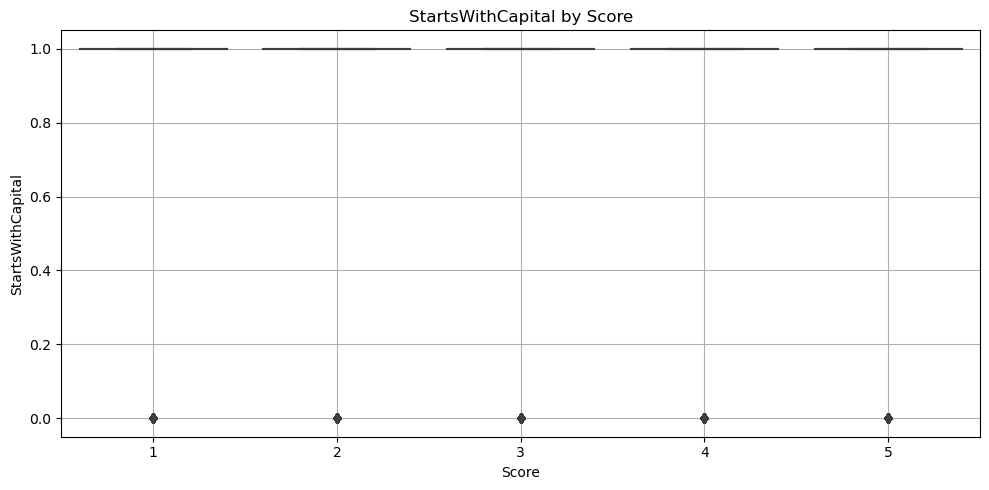

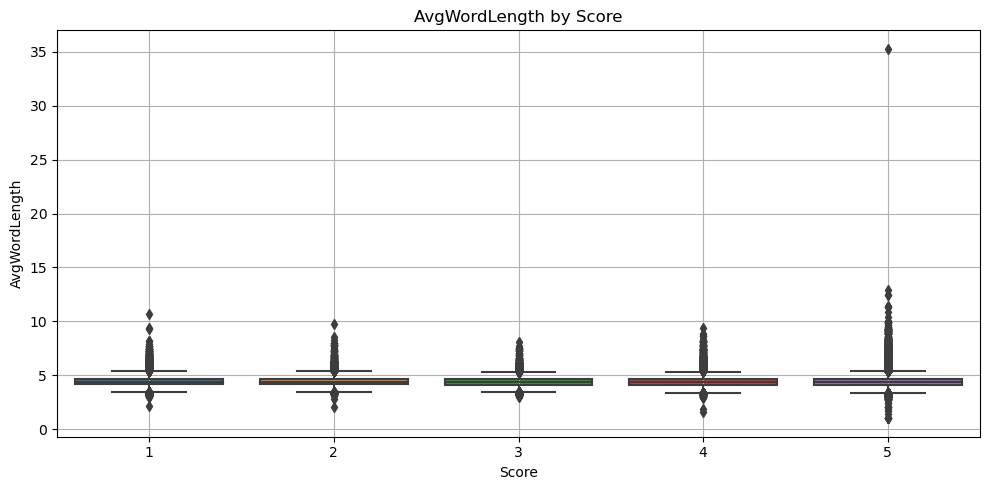

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Zet Score om naar een geordende categorische variabele
df['Score'] = pd.Categorical(df['Score'], categories=['1', '2', '3', '4', '5'], ordered=True)


# Zorg dat je DataFrame 'df' of 'eda_sample' bevat de eerder berekende features
# Gebruik eda_sample als je met een kleinere subset werkt

features = [
    'TextLengthWords',
    'TextLengthChars',
    'SummaryLengthWords',
    'TextToSummaryRatio',
    'SentimentText_Polarity',
    'SentimentText_Subjectivity',
    'SentimentSummary_Polarity',
    'SentimentDelta',
    'NumExclamations',
    'NumUppercaseWords',
    'HasQuestionMark',
    'ContainsNegation',
    'StartsWithCapital',
    'AvgWordLength'
]

# Zorg dat Score categorisch is voor betere visualisatie
df['Score'] = df['Score'].astype(str)
df['Score'] = pd.Categorical(df['Score'], categories=['1', '2', '3', '4', '5'], ordered=True)

# Genereer boxplots per feature
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Score', y=feature, data=df)
    plt.title(f'{feature} by Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()